## Choropleth Function and For Loop for L Line Stations

I am writing a function and for loop code to run choropleths of the foreign born populations around the station areas of L Line Stations we are studying.

In [107]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('acs_11_19_B01003_B05007.geojson')

In [9]:
list(gdf)

['FIPS',
 'Census Tract',
 '11 Total Population',
 '11 Total Foreign Born',
 '11 Total Entered 2000 or later',
 '11 Europe',
 '11 Europe Entered 2000 or later',
 '11 Asia',
 '11 Asia Entered 2000 or later',
 '11 Latin America',
 '11 Caribbean',
 '11 Caribbean Entered 2000 or later',
 '11 Central America',
 '11 Mexico',
 '11 Mexico Entered 2000 or later',
 '11 Other Central America',
 '11 Other Central America 2000 or later',
 '11 South America',
 '11 South America Entered 2000 or later',
 '11 Other areas',
 '11 Other areas Entered 2000 or later',
 '19 Total Population',
 '19 Total Foreign Born',
 '19 Total Entered 2010 or later',
 '19 Europe',
 '19 Europe Entered 2010 or later',
 '19 Asia',
 '19 Asia Entered 2010 or later',
 '19 Latin America',
 '19 Caribbean',
 '19 Caribbean entered 2010 or later',
 '19 Central America',
 '19 Mexico',
 '19 Mexico Entered 2010 or later',
 '19 Other Central America',
 '19 Other Central America Entered 2010 or later',
 '19 South America',
 '19 South Amer

In [5]:
gdf.head()

FIPS Census Tract  11 Total Population  \
0  Census Tract 1011.10, Los Angeles, CA         4283               2027.0   
1  Census Tract 1011.22, Los Angeles, CA         3405               1254.0   
2  Census Tract 1012.10, Los Angeles, CA         6347               3471.0   
3  Census Tract 1012.20, Los Angeles, CA         3702               1242.0   
4     Census Tract 1013, Los Angeles, CA         3884               1374.0   

   11 Total Foreign Born  11 Total Entered 2000 or later  11 Europe  \
0                  432.0                           432.0       93.0   
1                   87.0                            87.0      144.0   
2                 1168.0                          1168.0       39.0   
3                  247.0                           247.0       61.0   
4                  156.0                           156.0       97.0   

   11 Europe Entered 2000 or later  11 Asia  11 Asia Entered 2000 or later  \
0                             15.0   1467.0                          303.0   
1                              0.0   1026.0                           87.0   
2                              0.0   1919.0                          561.0   
3                              0.0    673.0                           98.0   
4                              0.0   1168.0                          141.0   

   11 Latin America  ...  19 Mexico  19 Mexico Entered 2010 or later  \
0             449.0  ...      446.0                            310.0   
1              66.0  ...       24.0                              0.0   
2            1458.0  ...     1137.0                            499.0   
3             437.0  ...      519.0                            334.0   
4              62.0  ...      110.0                             27.0   

   19 Other Central America  19 Other Central America Entered 2010 or later  \
0                       0.0                                            19.0   
1                       0.0                                            24.0   
2                       0.0                                           505.0   
3                       0.0                                           136.0   
4                       0.0                                            56.0   

   19 South America  19 South America Entered 2010 or later  19 Other Areas  \
0               0.0                                   109.0            26.0   
1               0.0                                     0.0             0.0   
2              73.0                                   114.0             0.0   
3              25.0                                     8.0             0.0   
4               0.0                                    27.0             0.0   

   19 Other Areas Entered 2010 or later  % Change Foreign Born  \
0                                  29.0              -7.195213   
1                                  21.0             -11.200293   
2                                  88.0              -3.265223   
3                                  18.0               2.097513   
4                                  83.0               9.362702   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 42 columns]

In [3]:
gdf2 = gpd.read_file('acs_merged.geojson')

In [4]:
gdf2.head()

FIPS                           Census Tract  11 Total Population  \
0  06037101110  Census Tract 1011.10, Los Angeles, CA               5012.0   
1  06037101122  Census Tract 1011.22, Los Angeles, CA               3584.0   
2  06037101210  Census Tract 1012.10, Los Angeles, CA               6529.0   
3  06037101220  Census Tract 1012.20, Los Angeles, CA               2751.0   
4  06037101300     Census Tract 1013, Los Angeles, CA               4123.0   

   11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  11 Asia  \
0                 2027.0       93.0                             15.0   1467.0   
1                 1254.0      144.0                              0.0   1026.0   
2                 3471.0       39.0                              0.0   1919.0   
3                 1242.0       61.0                              0.0    673.0   
4                 1374.0       97.0                              0.0   1168.0   

   11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  ...  \
0                          303.0             449.0           0.0  ...   
1                           87.0              66.0           8.0  ...   
2                          561.0            1458.0           0.0  ...   
3                           98.0             437.0          10.0  ...   
4                          141.0              62.0           0.0  ...   

   19 Mexico  19 Mexico Entered 2010 or later  19 Other Central America  \
0      310.0                             26.0                      19.0   
1        0.0                              0.0                      24.0   
2      499.0                              0.0                     505.0   
3      334.0                              0.0                     136.0   
4       27.0                              0.0                      56.0   

   19 Other Central America Entered 2010 or later  19 South America  \
0                                             0.0             109.0   
1                                             0.0               0.0   
2                                            73.0             114.0   
3                                            25.0               8.0   
4                                             0.0              27.0   

   19 South America Entered 2010 or later  19 Other Areas  \
0                                    24.0            29.0   
1                                     0.0            21.0   
2                                     0.0            88.0   
3                                     0.0            18.0   
4                                     0.0            83.0   

   19 Other Areas Entered 2010 or later  % Change Foreign Born  \
0                                   0.0              -7.195213   
1                                   0.0             -11.200293   
2                                   0.0              -3.265223   
3                                   0.0               2.097513   
4                                   0.0               9.362702   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 41 columns]

Going to move ahead using the acs_merged dataset since I see that Kevin used that for his Final Charts. 

In [5]:
# updating the gdf variable to be the acs_merged dataset 

gdf = gpd.read_file('acs_merged.geojson')

### Creating a single choropleth map

To make sure everything is running smoothly, I'm going to run a single choropleth map for Chinatown, just as we did for the midterm.

In [6]:
chinatown = gdf[gdf["FIPS"].isin(['06037206010', 
                                       '06037207103', 
                                       '06037207102',
                                       '06037206020']
                                      )
                     ]

In [10]:
chinatown.head()

FIPS                           Census Tract  11 Total Population  \
529  06037206010  Census Tract 2060.10, Los Angeles, CA               2947.0   
530  06037206020  Census Tract 2060.20, Los Angeles, CA               7677.0   
537  06037207102  Census Tract 2071.02, Los Angeles, CA               2276.0   
538  06037207103  Census Tract 2071.03, Los Angeles, CA               2098.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
529                 1661.0       18.0                              0.0   
530                 1404.0       14.0                              0.0   
537                 1753.0        1.0                              0.0   
538                 1728.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
529    926.0                          290.0             714.0          11.0   
530    189.0                           17.0            1187.0          55.0   
537   1592.0                          799.0             160.0          38.0   
538   1688.0                          626.0              22.0           0.0   

     ...  19 Mexico  19 Mexico Entered 2010 or later  \
529  ...      748.0                             13.0   
530  ...      448.0                             14.0   
537  ...      181.0                              0.0   
538  ...       12.0                              0.0   

     19 Other Central America  19 Other Central America Entered 2010 or later  \
529                     166.0                                             0.0   
530                     232.0                                            23.0   
537                     114.0                                             0.0   
538                      18.0                                             0.0   

     19 South America  19 South America Entered 2010 or later  19 Other Areas  \
529               0.0                                     0.0             0.0   
530               9.0                                     0.0            20.0   
537              25.0                                    13.0             1.0   
538              40.0                                    11.0             6.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
529                                   0.0              -6.398801   
530                                   0.0              -6.284370   
537                                   0.0             -14.239135   
538                                   0.0             -13.454837   

                                              geometry  
529  MULTIPOLYGON (((-118.23924 34.06726, -118.2380...  
530  MULTIPOLYGON (((-118.23787 34.05427, -118.2378...  
537  MULTIPOLYGON (((-118.24303 34.05735, -118.2429...  
538  MULTIPOLYGON (((-118.24557 34.06470, -118.2454...  

[4 rows x 41 columns]

<AxesSubplot:>

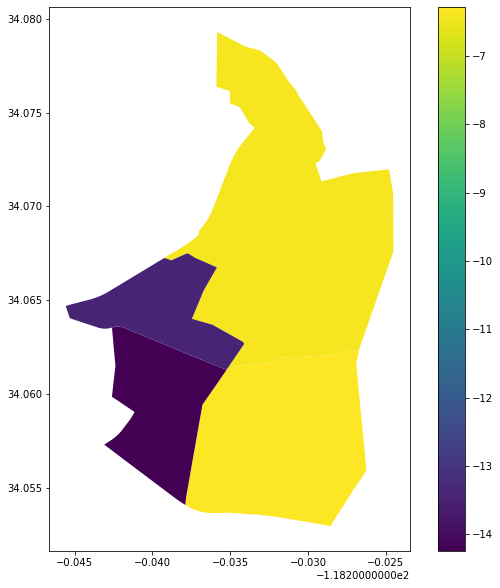

In [7]:
chinatown.plot(figsize=(10,10),
        column='% Change Foreign Born',
        legend=True)

In [96]:
chinatown_web_mercator = chinatown.to_crs(epsg=3857)

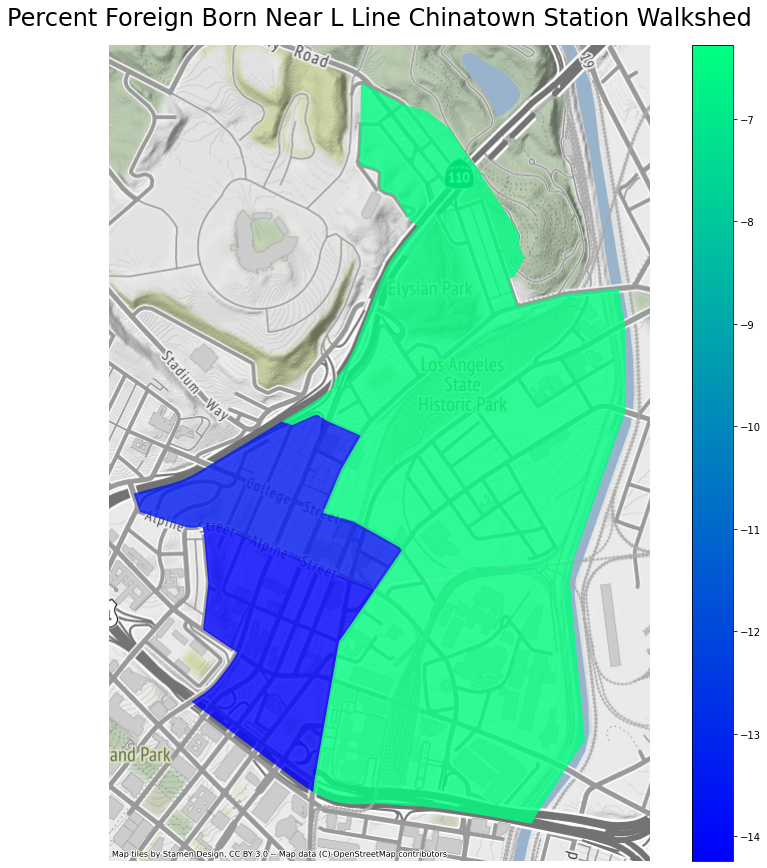

In [97]:
fig, ax = plt.subplots(figsize=(15, 15))
 
chinatown_web_mercator.plot(
                    column='% Change Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Chinatown Station Walkshed',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)

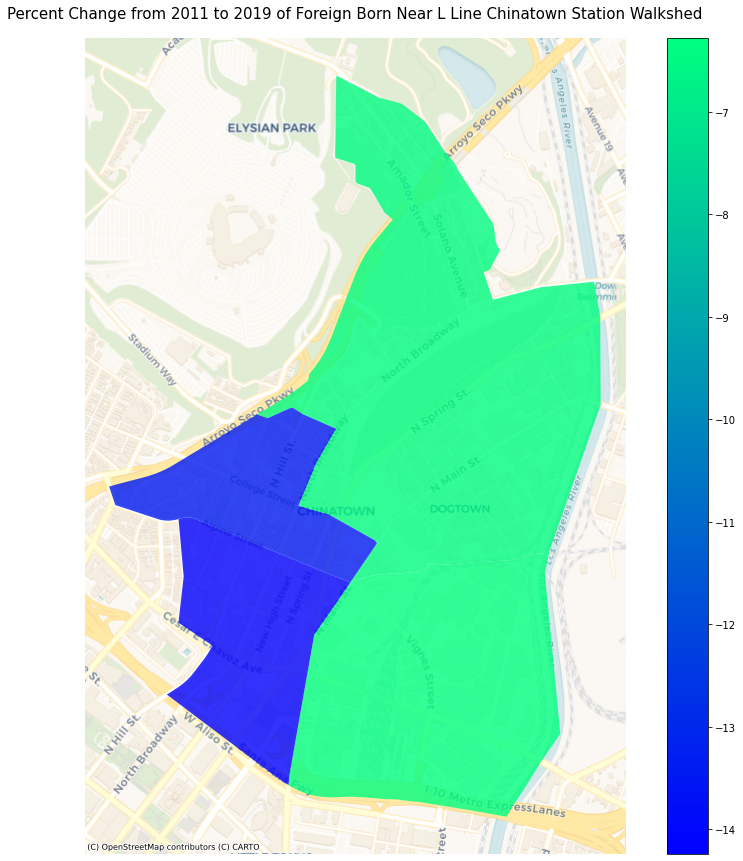

In [98]:
# Again, but with a new base map and updated title font size

fig, ax = plt.subplots(figsize=(15, 15))
 
chinatown_web_mercator.plot(
                    column='% Change Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Change from 2011 to 2019 of Foreign Born Near L Line Chinatown Station Walkshed',fontsize=15, pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

Okay, we're definitely able to create choropleths with this data. Now to write a function to run all our station areas. First, I will code a function and run it to see if it works. Then I will create a list with just the Chinatown Station, write a for loop, and run it to see if it works. If everything looks good, I will finally add my other stations to the list and run it again - with the final outcome being a choropleth similar to the one we have above.

In [15]:
chinatown.head()

FIPS                           Census Tract  11 Total Population  \
529  06037206010  Census Tract 2060.10, Los Angeles, CA               2947.0   
530  06037206020  Census Tract 2060.20, Los Angeles, CA               7677.0   
537  06037207102  Census Tract 2071.02, Los Angeles, CA               2276.0   
538  06037207103  Census Tract 2071.03, Los Angeles, CA               2098.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
529                 1661.0       18.0                              0.0   
530                 1404.0       14.0                              0.0   
537                 1753.0        1.0                              0.0   
538                 1728.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
529    926.0                          290.0             714.0          11.0   
530    189.0                           17.0            1187.0          55.0   
537   1592.0                          799.0             160.0          38.0   
538   1688.0                          626.0              22.0           0.0   

     ...  19 Mexico  19 Mexico Entered 2010 or later  \
529  ...      748.0                             13.0   
530  ...      448.0                             14.0   
537  ...      181.0                              0.0   
538  ...       12.0                              0.0   

     19 Other Central America  19 Other Central America Entered 2010 or later  \
529                     166.0                                             0.0   
530                     232.0                                            23.0   
537                     114.0                                             0.0   
538                      18.0                                             0.0   

     19 South America  19 South America Entered 2010 or later  19 Other Areas  \
529               0.0                                     0.0             0.0   
530               9.0                                     0.0            20.0   
537              25.0                                    13.0             1.0   
538              40.0                                    11.0             6.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
529                                   0.0              -6.398801   
530                                   0.0              -6.284370   
537                                   0.0             -14.239135   
538                                   0.0             -13.454837   

                                              geometry  
529  MULTIPOLYGON (((-118.23924 34.06726, -118.2380...  
530  MULTIPOLYGON (((-118.23787 34.05427, -118.2378...  
537  MULTIPOLYGON (((-118.24303 34.05735, -118.2429...  
538  MULTIPOLYGON (((-118.24557 34.06470, -118.2454...  

[4 rows x 41 columns]

### Writing a function

In [16]:
## pretty sure I can delete this

def stn_map(station = 'Chinatown Station', column = '% Change Foreign Born'):
    
    #this station
    this_stn = [chinatown[chinatown['station']==station]]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    chinatown.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

In [17]:
stn_map()

KeyError: 'station'

I got it to map Chinatown but I had to do "chinatown.plot". That's not going to work for our for loop. In order for our for loop to work, our function needs to reference our gdf in the function. To do this we  need to have a "station" column much like I made for the chinatown subset so that it knows which rows to pull when it's trying to map. 

The index numbers for Chinatown are 529, 530, 537, 538

# OFFICIAL FUNCTION AND FOR LOOP CODE

In [8]:
gdf.loc[529, 'station'] = "Chinatown"

In [9]:
gdf.loc[529]

FIPS                                                                                    06037206010
Census Tract                                                  Census Tract 2060.10, Los Angeles, CA
11 Total Population                                                                          2947.0
11 Total Foreign Born                                                                        1661.0
11 Europe                                                                                      18.0
11 Europe Entered 2000 or later                                                                 0.0
11 Asia                                                                                       926.0
11 Asia Entered 2000 or later                                                                 290.0
11 Latin America                                                                              714.0
11 Caribbean                                                                                   11.0


There it is at the end! I used [this](https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column) resource from stack overflow

In [10]:
gdf.loc[530, 'station'] = "Chinatown"

In [11]:
gdf.loc[537, 'station'] = "Chinatown"

In [12]:
gdf.loc[538, 'station'] = "Chinatown"

In [13]:
gdf.head()

FIPS                           Census Tract  11 Total Population  \
0  06037101110  Census Tract 1011.10, Los Angeles, CA               5012.0   
1  06037101122  Census Tract 1011.22, Los Angeles, CA               3584.0   
2  06037101210  Census Tract 1012.10, Los Angeles, CA               6529.0   
3  06037101220  Census Tract 1012.20, Los Angeles, CA               2751.0   
4  06037101300     Census Tract 1013, Los Angeles, CA               4123.0   

   11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  11 Asia  \
0                 2027.0       93.0                             15.0   1467.0   
1                 1254.0      144.0                              0.0   1026.0   
2                 3471.0       39.0                              0.0   1919.0   
3                 1242.0       61.0                              0.0    673.0   
4                 1374.0       97.0                              0.0   1168.0   

   11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  ...  \
0                          303.0             449.0           0.0  ...   
1                           87.0              66.0           8.0  ...   
2                          561.0            1458.0           0.0  ...   
3                           98.0             437.0          10.0  ...   
4                          141.0              62.0           0.0  ...   

   19 Mexico Entered 2010 or later  19 Other Central America  \
0                             26.0                      19.0   
1                              0.0                      24.0   
2                              0.0                     505.0   
3                              0.0                     136.0   
4                              0.0                      56.0   

   19 Other Central America Entered 2010 or later  19 South America  \
0                                             0.0             109.0   
1                                             0.0               0.0   
2                                            73.0             114.0   
3                                            25.0               8.0   
4                                             0.0              27.0   

   19 South America Entered 2010 or later  19 Other Areas  \
0                                    24.0            29.0   
1                                     0.0            21.0   
2                                     0.0            88.0   
3                                     0.0            18.0   
4                                     0.0            83.0   

   19 Other Areas Entered 2010 or later  % Change Foreign Born  \
0                                   0.0              -7.195213   
1                                   0.0             -11.200293   
2                                   0.0              -3.265223   
3                                   0.0               2.097513   
4                                   0.0               9.362702   

                                            geometry  station  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...      NaN  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...      NaN  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...      NaN  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...      NaN  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...      NaN  

[5 rows x 42 columns]

now let's try our function again using gdf and see if it'll produce a map only for Chinatown Station

In [14]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

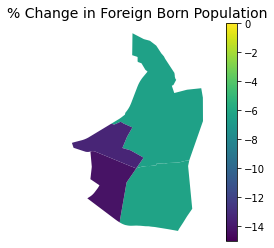

In [15]:
stn_map()

### writing our for loop

In [26]:
# INGORE THIS
## bringing in the chinatown subset again so that the new "station" column copies
chinatown = gdf[gdf["FIPS"].isin(['06037206010', 
                                       '06037207103', 
                                       '06037207102',
                                       '06037206020']
                                      )
                     ]

In [27]:
# IGNORE THIS
chinatown.head()

FIPS                           Census Tract  11 Total Population  \
529  06037206010  Census Tract 2060.10, Los Angeles, CA               2947.0   
530  06037206020  Census Tract 2060.20, Los Angeles, CA               7677.0   
537  06037207102  Census Tract 2071.02, Los Angeles, CA               2276.0   
538  06037207103  Census Tract 2071.03, Los Angeles, CA               2098.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
529                 1661.0       18.0                              0.0   
530                 1404.0       14.0                              0.0   
537                 1753.0        1.0                              0.0   
538                 1728.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
529    926.0                          290.0             714.0          11.0   
530    189.0                           17.0            1187.0          55.0   
537   1592.0                          799.0             160.0          38.0   
538   1688.0                          626.0              22.0           0.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
529  ...                             13.0                     166.0   
530  ...                             14.0                     232.0   
537  ...                              0.0                     114.0   
538  ...                              0.0                      18.0   

     19 Other Central America Entered 2010 or later  19 South America  \
529                                             0.0               0.0   
530                                            23.0               9.0   
537                                             0.0              25.0   
538                                             0.0              40.0   

     19 South America Entered 2010 or later  19 Other Areas  \
529                                     0.0             0.0   
530                                     0.0            20.0   
537                                    13.0             1.0   
538                                    11.0             6.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
529                                   0.0              -6.398801   
530                                   0.0              -6.284370   
537                                   0.0             -14.239135   
538                                   0.0             -13.454837   

                                              geometry    station  
529  MULTIPOLYGON (((-118.23924 34.06726, -118.2380...  Chinatown  
530  MULTIPOLYGON (((-118.23787 34.05427, -118.2378...  Chinatown  
537  MULTIPOLYGON (((-118.24303 34.05735, -118.2429...  Chinatown  
538  MULTIPOLYGON (((-118.24557 34.06470, -118.2454...  Chinatown  

[4 rows x 42 columns]

In [16]:
stations = ['Chinatown']

In [17]:
stations

['Chinatown']

We have a fully operating function, now it's time to write our for loop.

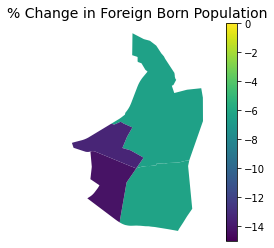

In [18]:
for stop in stations:
    stn_map(station = stop)

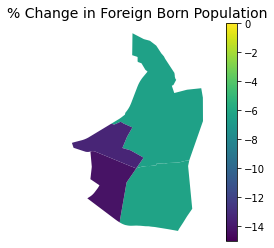

In [23]:
for station in stations:
    stn_map(station = stop)

okay, this worked, but what if we add delmar to our list. Will it successfully run a choropleth for it?

## Introducing delmar to the GDF Column and our Stations List

In [19]:
delmar = gdf[gdf["FIPS"].isin(['06037461902',  
                                '06037463602', 
                                '06037463700']
)
            ]

In [25]:
delmar.head()

FIPS                           Census Tract  11 Total Population  \
1360  06037461902  Census Tract 4619.02, Los Angeles, CA               1306.0   
1382  06037463602  Census Tract 4636.02, Los Angeles, CA               5047.0   
1383  06037463700     Census Tract 4637, Los Angeles, CA               2203.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1360                  321.0       39.0                              2.0   
1382                 1613.0      327.0                            108.0   
1383                  295.0       39.0                             23.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1360    141.0                            0.0             113.0           0.0   
1382    851.0                          234.0             345.0          86.0   
1383    184.0                           72.0              62.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1360  ...                              0.0                       0.0   
1382  ...                             19.0                     108.0   
1383  ...                              0.0                      40.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1360                                             0.0              16.0   
1382                                             0.0              21.0   
1383                                             0.0              25.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1360                                     0.0            28.0   
1382                                     0.0           112.0   
1383                                     8.0            54.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1360                                   0.0               7.958612   
1382                                 100.0              -0.161660   
1383                                   0.0               5.793363   

                                               geometry  station  
1360  MULTIPOLYGON (((-118.15570 34.14973, -118.1554...      NaN  
1382  MULTIPOLYGON (((-118.15046 34.14577, -118.1497...      NaN  
1383  MULTIPOLYGON (((-118.16776 34.14147, -118.1676...      NaN  

[3 rows x 42 columns]

In [20]:
gdf.loc[1360, 'station'] = "Del Mar"

In [21]:
gdf.loc[1382, 'station'] = "Del Mar"

In [22]:
gdf.loc[1383, 'station'] = "Del Mar"

In [23]:
delmar = gdf[gdf["FIPS"].isin(['06037461902',  
                                '06037463602', 
                                '06037463700']
)
            ]

In [30]:
delmar.head()

FIPS                           Census Tract  11 Total Population  \
1360  06037461902  Census Tract 4619.02, Los Angeles, CA               1306.0   
1382  06037463602  Census Tract 4636.02, Los Angeles, CA               5047.0   
1383  06037463700     Census Tract 4637, Los Angeles, CA               2203.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1360                  321.0       39.0                              2.0   
1382                 1613.0      327.0                            108.0   
1383                  295.0       39.0                             23.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1360    141.0                            0.0             113.0           0.0   
1382    851.0                          234.0             345.0          86.0   
1383    184.0                           72.0              62.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1360  ...                              0.0                       0.0   
1382  ...                             19.0                     108.0   
1383  ...                              0.0                      40.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1360                                             0.0              16.0   
1382                                             0.0              21.0   
1383                                             0.0              25.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1360                                     0.0            28.0   
1382                                     0.0           112.0   
1383                                     8.0            54.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1360                                   0.0               7.958612   
1382                                 100.0              -0.161660   
1383                                   0.0               5.793363   

                                               geometry  station  
1360  MULTIPOLYGON (((-118.15570 34.14973, -118.1554...  Del Mar  
1382  MULTIPOLYGON (((-118.15046 34.14577, -118.1497...  Del Mar  
1383  MULTIPOLYGON (((-118.16776 34.14147, -118.1676...  Del Mar  

[3 rows x 42 columns]

In [24]:
stations = ['Chinatown', 'Del Mar']

In [25]:
stations

['Chinatown', 'Del Mar']

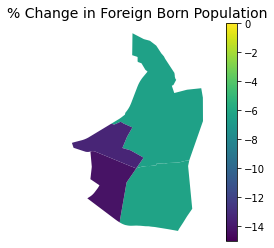

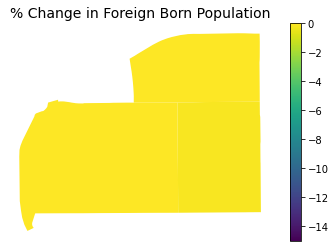

In [26]:
## note ths new argument!! This is our final code!

for station in stations:
    stn_map(station = station)

WOAH! YES! There they are! Just need to update the Function to have more inclusive range. Pasadena saw mostly gains so we are stuck at Yellow with this current range. I'm going to enter all our station names into the columns so we can run the whole thing!

In [27]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, depending on what the loop is telling it
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=5,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

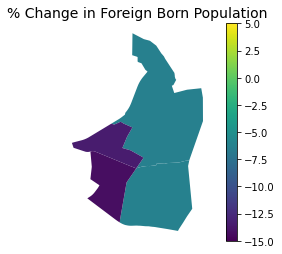

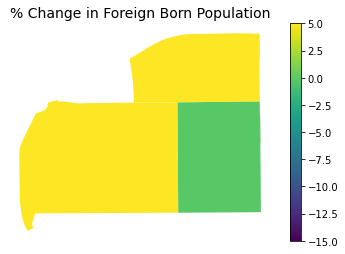

In [28]:
for station in stations:
    stn_map(station = station)

### Confirming our Census Tracts

## Arcadia

In [29]:
arcadia = gdf[gdf["FIPS"].isin(['06037430801', 
                                '06037430721', 
                                '06037430400',]
                                      )
                     ]

In [30]:
arcadia.head()

FIPS                           Census Tract  11 Total Population  \
1273  06037430400     Census Tract 4304, Los Angeles, CA               4877.0   
1278  06037430721  Census Tract 4307.21, Los Angeles, CA               2973.0   
1281  06037430801  Census Tract 4308.01, Los Angeles, CA               6719.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1273                 2002.0       79.0                             59.0   
1278                 1287.0       81.0                             13.0   
1281                 4035.0       37.0                              0.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1273   1683.0                          222.0             206.0          30.0   
1278   1134.0                          245.0              51.0           0.0   
1281   3448.0                         1290.0             482.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1273  ...                              0.0                       0.0   
1278  ...                              7.0                       7.0   
1281  ...                              0.0                       0.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1273                                             0.0              24.0   
1278                                             0.0              52.0   
1281                                             0.0              31.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1273                                     0.0            17.0   
1278                                    32.0             1.0   
1281                                     0.0           121.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1273                                   7.0               5.632639   
1278                                   0.0               5.814608   
1281                                  48.0              -5.138131   

                                               geometry  station  
1273  MULTIPOLYGON (((-118.03194 34.16693, -118.0318...      NaN  
1278  MULTIPOLYGON (((-118.05451 34.13186, -118.0543...      NaN  
1281  MULTIPOLYGON (((-118.03153 34.14550, -118.0284...      NaN  

[3 rows x 42 columns]

In [31]:
gdf.loc[1273, 'station'] = "Arcadia"

In [32]:
gdf.loc[1278, 'station'] = "Arcadia"

In [33]:
gdf.loc[1281, 'station'] = "Arcadia"

In [34]:
arcadia = gdf[gdf["FIPS"].isin(['06037430801', 
                                '06037430721', 
                                '06037430400',]
                                      )
                     ]

In [35]:
arcadia.head()

FIPS                           Census Tract  11 Total Population  \
1273  06037430400     Census Tract 4304, Los Angeles, CA               4877.0   
1278  06037430721  Census Tract 4307.21, Los Angeles, CA               2973.0   
1281  06037430801  Census Tract 4308.01, Los Angeles, CA               6719.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1273                 2002.0       79.0                             59.0   
1278                 1287.0       81.0                             13.0   
1281                 4035.0       37.0                              0.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1273   1683.0                          222.0             206.0          30.0   
1278   1134.0                          245.0              51.0           0.0   
1281   3448.0                         1290.0             482.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1273  ...                              0.0                       0.0   
1278  ...                              7.0                       7.0   
1281  ...                              0.0                       0.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1273                                             0.0              24.0   
1278                                             0.0              52.0   
1281                                             0.0              31.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1273                                     0.0            17.0   
1278                                    32.0             1.0   
1281                                     0.0           121.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1273                                   7.0               5.632639   
1278                                   0.0               5.814608   
1281                                  48.0              -5.138131   

                                               geometry  station  
1273  MULTIPOLYGON (((-118.03194 34.16693, -118.0318...  Arcadia  
1278  MULTIPOLYGON (((-118.05451 34.13186, -118.0543...  Arcadia  
1281  MULTIPOLYGON (((-118.03153 34.14550, -118.0284...  Arcadia  

[3 rows x 42 columns]

In [36]:
stations = ['Chinatown', 'Del Mar', 'Arcadia']

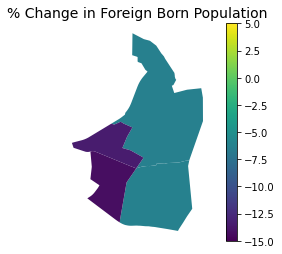

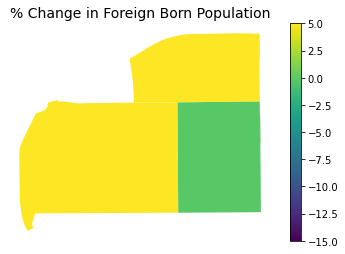

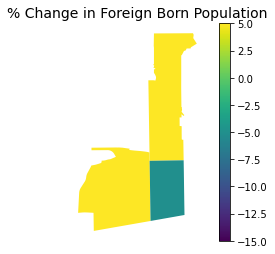

In [37]:
for station in stations:
    stn_map(station = station)

### Highland Park Station

In [38]:
highlandpark = gdf[gdf["FIPS"].isin(['06037183610', 
                                     '06037183510', 
                                     '06037183520',
                                     '06037183810',
                                     '06037183820',
                                     '06037183701',
                                     '06037183101',
                                     '06037183620']
                                      )
                     ]

In [39]:
highlandpark.tail()

FIPS                           Census Tract  11 Total Population  \
368  06037183610  Census Tract 1836.10, Los Angeles, CA               3436.0   
369  06037183620  Census Tract 1836.20, Los Angeles, CA               3337.0   
370  06037183701  Census Tract 1837.01, Los Angeles, CA               3700.0   
372  06037183810  Census Tract 1838.10, Los Angeles, CA               4185.0   
373  06037183820  Census Tract 1838.20, Los Angeles, CA               3126.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
368                 1597.0        3.0                              0.0   
369                 1779.0        0.0                              0.0   
370                 1341.0        0.0                              0.0   
372                 1842.0        8.0                              0.0   
373                 1448.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
368    171.0                           12.0            1423.0           0.0   
369    314.0                            0.0            1456.0          65.0   
370    131.0                            0.0            1210.0          13.0   
372    103.0                           27.0            1731.0           0.0   
373     97.0                           40.0            1351.0           0.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
368  ...                             60.0                     308.0   
369  ...                              8.0                     263.0   
370  ...                             15.0                     112.0   
372  ...                            214.0                     494.0   
373  ...                              0.0                     557.0   

     19 Other Central America Entered 2010 or later  19 South America  \
368                                             0.0              35.0   
369                                             5.0               0.0   
370                                             0.0              29.0   
372                                            20.0              29.0   
373                                           131.0              20.0   

     19 South America Entered 2010 or later  19 Other Areas  \
368                                     7.0            17.0   
369                                     0.0             5.0   
370                                     0.0             0.0   
372                                     0.0             0.0   
373                                     0.0            77.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
368                                   5.0              -8.189194   
369                                   0.0             -15.220711   
370                                   0.0              -9.684103   
372                                   0.0              -3.658824   
373                                  39.0              -0.893020   

                                              geometry  station  
368  MULTIPOLYGON (((-118.19796 34.11446, -118.1977...      NaN  
369  MULTIPOLYGON (((-118.19448 34.11592, -118.1942...      NaN  
370  MULTIPOLYGON (((-118.19266 34.10966, -118.1920...      NaN  
372  MULTIPOLYGON (((-118.20374 34.10718, -118.2024...      NaN  
373  MULTIPOLYGON (((-118.20290 34.10275, -118.2028...      NaN  

[5 rows x 42 columns]

In [40]:
gdf.loc[357, 'station'] = "Highland Park"

In [41]:
gdf.loc[366, 'station'] = "Highland Park"

In [42]:
gdf.loc[367, 'station'] = "Highland Park"

In [43]:
gdf.loc[368, 'station'] = "Highland Park"

In [44]:
gdf.loc[369, 'station'] = "Highland Park"

In [45]:
gdf.loc[370, 'station'] = "Highland Park"

In [46]:
gdf.loc[372, 'station'] = "Highland Park"

In [47]:
gdf.loc[373, 'station'] = "Highland Park"

In [48]:
highlandpark = gdf[gdf["FIPS"].isin(['06037183610', 
                                     '06037183510', 
                                     '06037183520',
                                     '06037183810',
                                     '06037183820',
                                     '06037183701',
                                     '06037183101',
                                     '06037183620']
                                      )
                     ]

In [49]:
highlandpark.head()

FIPS                           Census Tract  11 Total Population  \
357  06037183101  Census Tract 1831.01, Los Angeles, CA               4231.0   
366  06037183510  Census Tract 1835.10, Los Angeles, CA               2982.0   
367  06037183520  Census Tract 1835.20, Los Angeles, CA               3990.0   
368  06037183610  Census Tract 1836.10, Los Angeles, CA               3436.0   
369  06037183620  Census Tract 1836.20, Los Angeles, CA               3337.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
357                 1536.0       27.0                              0.0   
366                 1203.0       14.0                             14.0   
367                 1714.0       22.0                              0.0   
368                 1597.0        3.0                              0.0   
369                 1779.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
357    114.0                            0.0            1353.0           0.0   
366    196.0                           82.0             993.0           0.0   
367     11.0                            0.0            1681.0           0.0   
368    171.0                           12.0            1423.0           0.0   
369    314.0                            0.0            1456.0          65.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
357  ...                             32.0                     202.0   
366  ...                              0.0                     178.0   
367  ...                             54.0                     324.0   
368  ...                             60.0                     308.0   
369  ...                              8.0                     263.0   

     19 Other Central America Entered 2010 or later  19 South America  \
357                                             0.0              35.0   
366                                            22.0              28.0   
367                                            16.0              38.0   
368                                             0.0              35.0   
369                                             5.0               0.0   

     19 South America Entered 2010 or later  19 Other Areas  \
357                                     8.0            34.0   
366                                     9.0            11.0   
367                                    14.0             0.0   
368                                     7.0            17.0   
369                                     0.0             5.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
357                                  34.0              -3.622162   
366                                   5.0             -11.238443   
367                                   0.0              -8.071816   
368                                   5.0              -8.189194   
369                                   0.0             -15.220711   

                                              geometry        station  
357  MULTIPOLYGON (((-118.18743 34.12817, -118.1855...  Highland Park  
366  MULTIPOLYGON (((-118.20800 34.11272, -118.2080...  Highland Park  
367  MULTIPOLYGON (((-118.20733 34.11181, -118.2062...  Highland Park  
368  MULTIPOLYGON (((-118.19796 34.11446, -118.1977...  Highland Park  
369  MULTIPOLYGON (((-118.19448 34.11592, -118.1942...  Highland Park  

[5 rows x 42 columns]

In [50]:
stations = ['Chinatown', 'Del Mar', 'Arcadia', 'Highland Park']

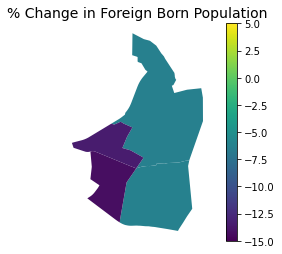

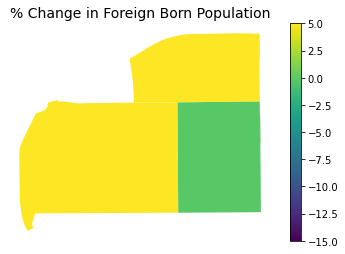

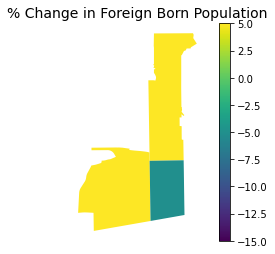

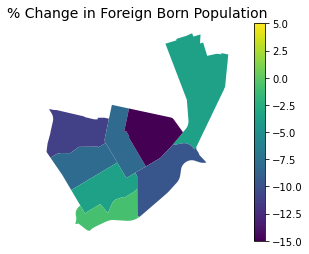

In [51]:
for station in stations:
    stn_map(station = station)

In [52]:
heritage = gdf[gdf["FIPS"].isin(['06037199000', 
                                     '06037185202', 
                                     '06037199400',
                                     '06037199300',
                                     '06037185310']
                                      )
                     ]

In [53]:
heritage.head()

FIPS                           Census Tract  11 Total Population  \
375  06037185202  Census Tract 1852.02, Los Angeles, CA               3897.0   
378  06037185310  Census Tract 1853.10, Los Angeles, CA               3398.0   
483  06037199000     Census Tract 1990, Los Angeles, CA               4711.0   
488  06037199300     Census Tract 1993, Los Angeles, CA               4084.0   
489  06037199400     Census Tract 1994, Los Angeles, CA               4822.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
375                 1312.0       68.0                             58.0   
378                 1669.0        0.0                              0.0   
483                 2501.0        6.0                              0.0   
488                 1331.0       50.0                             10.0   
489                 2388.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
375    194.0                           37.0            1032.0           0.0   
378     93.0                           20.0            1563.0           0.0   
483   1214.0                          345.0            1281.0           0.0   
488    278.0                           84.0             984.0           0.0   
489    666.0                          222.0            1722.0          23.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
375  ...                              0.0                     193.0   
378  ...                              9.0                     214.0   
483  ...                             13.0                     607.0   
488  ...                             54.0                     239.0   
489  ...                             39.0                     401.0   

     19 Other Central America Entered 2010 or later  19 South America  \
375                                            15.0              63.0   
378                                            62.0              33.0   
483                                           126.0              19.0   
488                                             0.0              52.0   
489                                            98.0               0.0   

     19 South America Entered 2010 or later  19 Other Areas  \
375                                    18.0             9.0   
378                                     0.0             8.0   
483                                     0.0            46.0   
488                                    15.0            63.0   
489                                     0.0            19.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
375                                   9.0              -5.323940   
378                                   8.0             -11.876629   
483                                   0.0              -1.502540   
488                                  30.0               2.392744   
489                                   0.0              -1.781897   

                                              geometry  station  
375  MULTIPOLYGON (((-118.22656 34.09795, -118.2265...      NaN  
378  MULTIPOLYGON (((-118.22881 34.09588, -118.2264...      NaN  
483  MULTIPOLYGON (((-118.22723 34.08122, -118.2270...      NaN  
488  MULTIPOLYGON (((-118.21217 34.08388, -118.2120...      NaN  
489  MULTIPOLYGON (((-118.21481 34.07928, -118.2145...      NaN  

[5 rows x 42 columns]

In [54]:
gdf.loc[375, 'station'] = "Heritage Square"

In [55]:
gdf.loc[378, 'station'] = "Heritage Square"

In [56]:
gdf.loc[483, 'station'] = "Heritage Square"

In [57]:
gdf.loc[488, 'station'] = "Heritage Square"

In [58]:
gdf.loc[489, 'station'] = "Heritage Square"

In [59]:
heritage = gdf[gdf["FIPS"].isin(['06037199000', 
                                     '06037185202', 
                                     '06037199400',
                                     '06037199300',
                                     '06037185310']
                                      )
                     ]

In [60]:
heritage.head()

FIPS                           Census Tract  11 Total Population  \
375  06037185202  Census Tract 1852.02, Los Angeles, CA               3897.0   
378  06037185310  Census Tract 1853.10, Los Angeles, CA               3398.0   
483  06037199000     Census Tract 1990, Los Angeles, CA               4711.0   
488  06037199300     Census Tract 1993, Los Angeles, CA               4084.0   
489  06037199400     Census Tract 1994, Los Angeles, CA               4822.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
375                 1312.0       68.0                             58.0   
378                 1669.0        0.0                              0.0   
483                 2501.0        6.0                              0.0   
488                 1331.0       50.0                             10.0   
489                 2388.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
375    194.0                           37.0            1032.0           0.0   
378     93.0                           20.0            1563.0           0.0   
483   1214.0                          345.0            1281.0           0.0   
488    278.0                           84.0             984.0           0.0   
489    666.0                          222.0            1722.0          23.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
375  ...                              0.0                     193.0   
378  ...                              9.0                     214.0   
483  ...                             13.0                     607.0   
488  ...                             54.0                     239.0   
489  ...                             39.0                     401.0   

     19 Other Central America Entered 2010 or later  19 South America  \
375                                            15.0              63.0   
378                                            62.0              33.0   
483                                           126.0              19.0   
488                                             0.0              52.0   
489                                            98.0               0.0   

     19 South America Entered 2010 or later  19 Other Areas  \
375                                    18.0             9.0   
378                                     0.0             8.0   
483                                     0.0            46.0   
488                                    15.0            63.0   
489                                     0.0            19.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
375                                   9.0              -5.323940   
378                                   8.0             -11.876629   
483                                   0.0              -1.502540   
488                                  30.0               2.392744   
489                                   0.0              -1.781897   

                                              geometry          station  
375  MULTIPOLYGON (((-118.22656 34.09795, -118.2265...  Heritage Square  
378  MULTIPOLYGON (((-118.22881 34.09588, -118.2264...  Heritage Square  
483  MULTIPOLYGON (((-118.22723 34.08122, -118.2270...  Heritage Square  
488  MULTIPOLYGON (((-118.21217 34.08388, -118.2120...  Heritage Square  
489  MULTIPOLYGON (((-118.21481 34.07928, -118.2145...  Heritage Square  

[5 rows x 42 columns]

In [61]:
stations = ['Arcadia', 'Del Mar', 'Highland Park', 'Heritage Square', 'Chinatown']

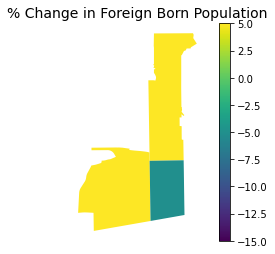

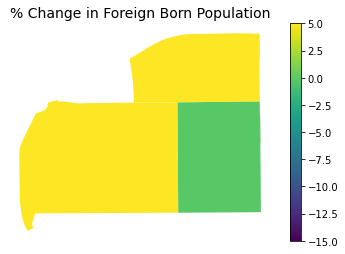

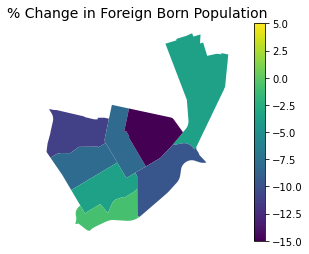

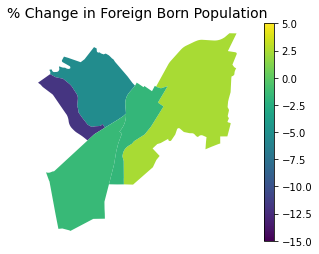

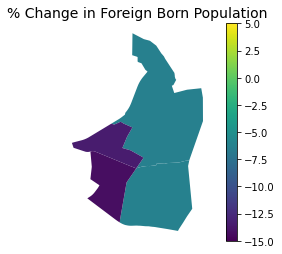

In [62]:
for station in stations:
    stn_map(station = station)

### Mariachi Plaza and East LA Civic Center

In [63]:
mariachi = gdf[gdf["FIPS"].isin(['06037203500', 
                                 '06037203600', 
                                 '06037204410',
                                 '06037204420',
                                 '06037204600',
                                 '06037206050',
                                 '06037206032']
                                    )
                     ]

In [64]:
mariachi.tail()

FIPS                           Census Tract  11 Total Population  \
519  06037204410  Census Tract 2044.10, Los Angeles, CA               2239.0   
520  06037204420  Census Tract 2044.20, Los Angeles, CA               3719.0   
521  06037204600     Census Tract 2046, Los Angeles, CA               4566.0   
532  06037206032  Census Tract 2060.32, Los Angeles, CA               5265.0   
533  06037206050  Census Tract 2060.50, Los Angeles, CA               2430.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
519                 1264.0        2.0                              0.0   
520                 2077.0        0.0                              0.0   
521                 2412.0        0.0                              0.0   
532                 2592.0       10.0                             10.0   
533                 1030.0       20.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
519      0.0                            0.0            1262.0           0.0   
520     39.0                            0.0            2038.0           9.0   
521      0.0                            0.0            2412.0          10.0   
532    560.0                          121.0            2022.0           0.0   
533     71.0                            4.0             924.0           6.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
519  ...                             27.0                     132.0   
520  ...                             45.0                     189.0   
521  ...                              0.0                     244.0   
532  ...                            157.0                     526.0   
533  ...                              0.0                     257.0   

     19 Other Central America Entered 2010 or later  19 South America  \
519                                            49.0               0.0   
520                                            41.0               0.0   
521                                            54.0              21.0   
532                                           112.0              43.0   
533                                            34.0              11.0   

     19 South America Entered 2010 or later  19 Other Areas  \
519                                     0.0             0.0   
520                                     0.0             0.0   
521                                     0.0            14.0   
532                                     0.0            30.0   
533                                     0.0             0.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
519                                   0.0             -10.473191   
520                                   0.0             -10.857858   
521                                  14.0             -13.315426   
532                                   0.0              -1.736484   
533                                   0.0               2.960288   

                                              geometry  station  
519  MULTIPOLYGON (((-118.21841 34.04440, -118.2183...      NaN  
520  MULTIPOLYGON (((-118.21489 34.04315, -118.2143...      NaN  
521  MULTIPOLYGON (((-118.22040 34.02978, -118.2203...      NaN  
532  MULTIPOLYGON (((-118.22878 34.05231, -118.2287...      NaN  
533  MULTIPOLYGON (((-118.22839 34.04156, -118.2281...      NaN  

[5 rows x 42 columns]

In [65]:
gdf.loc[509, 'station'] = "Mariachi Plaza"

In [66]:
gdf.loc[510, 'station'] = "Mariachi Plaza"

In [67]:
gdf.loc[519, 'station'] = "Mariachi Plaza"

In [68]:
gdf.loc[520, 'station'] = "Mariachi Plaza"

In [69]:
gdf.loc[521, 'station'] = "Mariachi Plaza"

In [70]:
gdf.loc[532, 'station'] = "Mariachi Plaza"

In [71]:
gdf.loc[533, 'station'] = "Mariachi Plaza"

In [72]:
mariachi = gdf[gdf["FIPS"].isin(['06037203500', 
                                 '06037203600', 
                                 '06037204410',
                                 '06037204420',
                                 '06037204600',
                                 '06037206050',
                                 '06037206032']
                                    )
                     ]

In [73]:
mariachi.head()

FIPS                           Census Tract  11 Total Population  \
509  06037203500     Census Tract 2035, Los Angeles, CA               3339.0   
510  06037203600     Census Tract 2036, Los Angeles, CA               4572.0   
519  06037204410  Census Tract 2044.10, Los Angeles, CA               2239.0   
520  06037204420  Census Tract 2044.20, Los Angeles, CA               3719.0   
521  06037204600     Census Tract 2046, Los Angeles, CA               4566.0   

     11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
509                 1459.0        0.0                              0.0   
510                 2072.0        0.0                              0.0   
519                 1264.0        2.0                              0.0   
520                 2077.0        0.0                              0.0   
521                 2412.0        0.0                              0.0   

     11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
509    375.0                          221.0            1075.0           0.0   
510      0.0                            0.0            2072.0           0.0   
519      0.0                            0.0            1262.0           0.0   
520     39.0                            0.0            2038.0           9.0   
521      0.0                            0.0            2412.0          10.0   

     ...  19 Mexico Entered 2010 or later  19 Other Central America  \
509  ...                              6.0                     151.0   
510  ...                            200.0                     314.0   
519  ...                             27.0                     132.0   
520  ...                             45.0                     189.0   
521  ...                              0.0                     244.0   

     19 Other Central America Entered 2010 or later  19 South America  \
509                                             0.0               0.0   
510                                           102.0              44.0   
519                                            49.0               0.0   
520                                            41.0               0.0   
521                                            54.0              21.0   

     19 South America Entered 2010 or later  19 Other Areas  \
509                                     0.0             0.0   
510                                    11.0             0.0   
519                                     0.0             0.0   
520                                     0.0             0.0   
521                                     0.0            14.0   

     19 Other Areas Entered 2010 or later  % Change Foreign Born  \
509                                   0.0              -2.416048   
510                                   0.0              -2.559669   
519                                   0.0             -10.473191   
520                                   0.0             -10.857858   
521                                  14.0             -13.315426   

                                              geometry         station  
509  MULTIPOLYGON (((-118.22845 34.05311, -118.2284...  Mariachi Plaza  
510  MULTIPOLYGON (((-118.21404 34.05515, -118.2140...  Mariachi Plaza  
519  MULTIPOLYGON (((-118.21841 34.04440, -118.2183...  Mariachi Plaza  
520  MULTIPOLYGON (((-118.21489 34.04315, -118.2143...  Mariachi Plaza  
521  MULTIPOLYGON (((-118.22040 34.02978, -118.2203...  Mariachi Plaza  

[5 rows x 42 columns]

In [74]:
civic = gdf[gdf["FIPS"].isin(['06037530400', 
                              '06037530301', 
                              '06037531603',
                              '06037531604',
                              '06037531504',
                              '06037531503',
                              '06037531000',
                              '06037530500']
                                    )
                     ]

In [75]:
civic.tail()

FIPS                           Census Tract  11 Total Population  \
1541  06037531000     Census Tract 5310, Los Angeles, CA               5219.0   
1549  06037531503  Census Tract 5315.03, Los Angeles, CA               3651.0   
1550  06037531504  Census Tract 5315.04, Los Angeles, CA               4631.0   
1552  06037531603  Census Tract 5316.03, Los Angeles, CA               3617.0   
1553  06037531604  Census Tract 5316.04, Los Angeles, CA               3555.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1541                 2134.0        9.0                              0.0   
1549                 1826.0        0.0                              0.0   
1550                 1965.0        0.0                              0.0   
1552                 1568.0        0.0                              0.0   
1553                 1661.0        0.0                              0.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1541      0.0                            0.0            2124.0           0.0   
1549      0.0                            0.0            1826.0           0.0   
1550      0.0                            0.0            1946.0           0.0   
1552      0.0                            0.0            1568.0           0.0   
1553      0.0                            0.0            1661.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1541  ...                             69.0                     135.0   
1549  ...                             44.0                     109.0   
1550  ...                             91.0                     199.0   
1552  ...                             37.0                     169.0   
1553  ...                             71.0                     111.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1541                                             0.0               9.0   
1549                                             0.0               0.0   
1550                                             0.0               0.0   
1552                                             0.0               0.0   
1553                                             0.0              12.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1541                                     0.0             0.0   
1549                                     0.0             0.0   
1550                                     0.0             0.0   
1552                                     0.0             0.0   
1553                                     0.0             0.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1541                                   0.0              -6.016665   
1549                                   0.0             -15.651181   
1550                                   0.0              -5.184381   
1552                                   0.0              -6.155185   
1553                                   0.0              -9.689813   

                                               geometry  station  
1541  MULTIPOLYGON (((-118.17866 34.03421, -118.1786...      NaN  
1549  MULTIPOLYGON (((-118.18047 34.03340, -118.1804...      NaN  
1550  MULTIPOLYGON (((-118.17096 34.02362, -118.1706...      NaN  
1552  MULTIPOLYGON (((-118.16494 34.02822, -118.1647...      NaN  
1553  MULTIPOLYGON (((-118.16675 34.02304, -118.1666...      NaN  

[5 rows x 42 columns]

In [76]:
gdf.loc[1530, 'station'] = "East LA Civic Center"

In [77]:
gdf.loc[1532, 'station'] = "East LA Civic Center"

In [78]:
gdf.loc[1533, 'station'] = "East LA Civic Center"

In [79]:
gdf.loc[1541, 'station'] = "East LA Civic Center"

In [80]:
gdf.loc[1549, 'station'] = "East LA Civic Center"

In [81]:
gdf.loc[1550, 'station'] = "East LA Civic Center"

In [82]:
gdf.loc[1552, 'station'] = "East LA Civic Center"

In [83]:
gdf.loc[1553, 'station'] = "East LA Civic Center"

In [84]:
civic = gdf[gdf["FIPS"].isin(['06037530400', 
                              '06037530301', 
                              '06037531603',
                              '06037531604',
                              '06037531504',
                              '06037531503',
                              '06037531000',
                              '06037530500']
                                    )
                     ]

In [85]:
civic.head()

FIPS                           Census Tract  11 Total Population  \
1530  06037530301  Census Tract 5303.01, Los Angeles, CA               2389.0   
1532  06037530400     Census Tract 5304, Los Angeles, CA               3427.0   
1533  06037530500     Census Tract 5305, Los Angeles, CA               4555.0   
1541  06037531000     Census Tract 5310, Los Angeles, CA               5219.0   
1549  06037531503  Census Tract 5315.03, Los Angeles, CA               3651.0   

      11 Total Foreign Born  11 Europe  11 Europe Entered 2000 or later  \
1530                 1190.0        4.0                              0.0   
1532                 1015.0        0.0                              0.0   
1533                 1560.0        1.0                              0.0   
1541                 2134.0        9.0                              0.0   
1549                 1826.0        0.0                              0.0   

      11 Asia  11 Asia Entered 2000 or later  11 Latin America  11 Caribbean  \
1530     36.0                            0.0            1150.0           0.0   
1532    274.0                           16.0             715.0           0.0   
1533      0.0                            0.0            1557.0          27.0   
1541      0.0                            0.0            2124.0           0.0   
1549      0.0                            0.0            1826.0           0.0   

      ...  19 Mexico Entered 2010 or later  19 Other Central America  \
1530  ...                             58.0                      54.0   
1532  ...                              0.0                     161.0   
1533  ...                             41.0                     181.0   
1541  ...                             69.0                     135.0   
1549  ...                             44.0                     109.0   

      19 Other Central America Entered 2010 or later  19 South America  \
1530                                             0.0               9.0   
1532                                             0.0              14.0   
1533                                            18.0               0.0   
1541                                             0.0               9.0   
1549                                             0.0               0.0   

      19 South America Entered 2010 or later  19 Other Areas  \
1530                                     0.0             0.0   
1532                                     0.0             0.0   
1533                                     0.0            12.0   
1541                                     0.0             0.0   
1549                                     0.0             0.0   

      19 Other Areas Entered 2010 or later  % Change Foreign Born  \
1530                                   0.0             -10.689068   
1532                                   0.0               4.837387   
1533                                   0.0               6.515567   
1541                                   0.0              -6.016665   
1549                                   0.0             -15.651181   

                                               geometry               station  
1530  MULTIPOLYGON (((-118.15978 34.02568, -118.1595...  East LA Civic Center  
1532  MULTIPOLYGON (((-118.16186 34.03384, -118.1617...  East LA Civic Center  
1533  MULTIPOLYGON (((-118.16991 34.03369, -118.1698...  East LA Civic Center  
1541  MULTIPOLYGON (((-118.17866 34.03421, -118.1786...  East LA Civic Center  
1549  MULTIPOLYGON (((-118.18047 34.03340, -118.1804...  East LA Civic Center  

[5 rows x 42 columns]

In [86]:
stations = ['Arcadia', 'Del Mar', 'Highland Park', 'Heritage Square', 'Chinatown', 'Mariachi Plaza', 'East LA Civic Center']

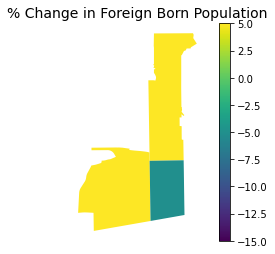

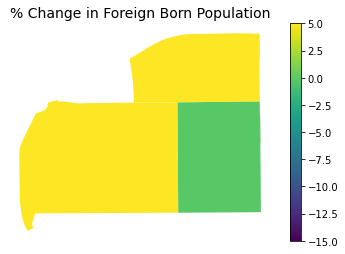

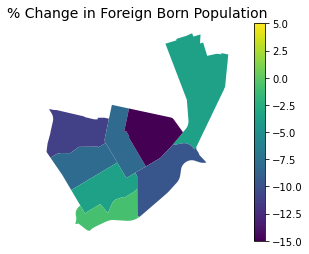

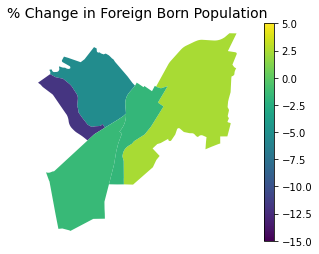

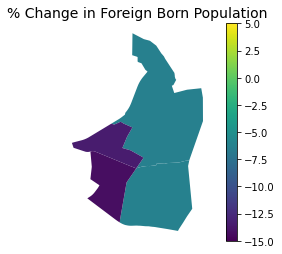

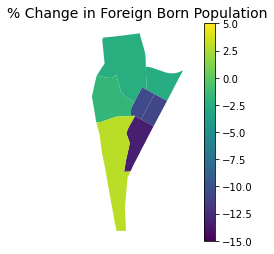

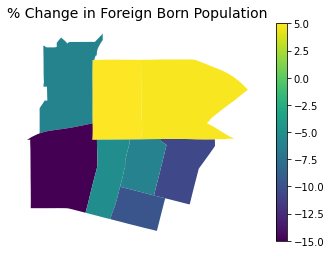

In [87]:
for station in stations:
    stn_map(station = station)

In [88]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, depending on what the loop is telling it
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=5,
                legend=True)

#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    ax.set_title(station + ' Station' + ' % Change in Foreign Born Population', fontsize=14)

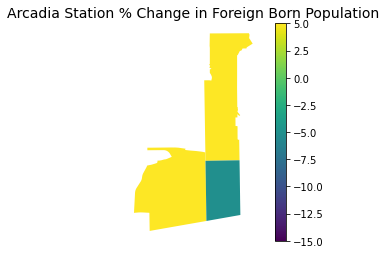

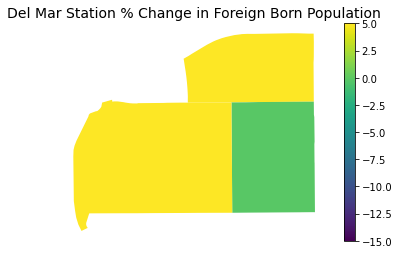

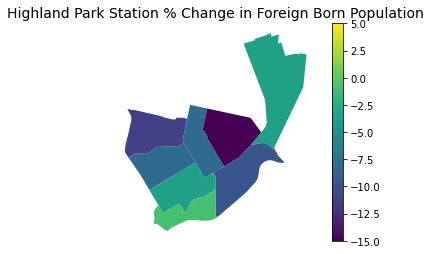

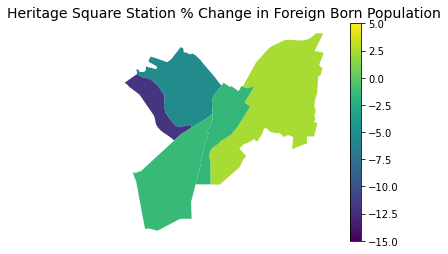

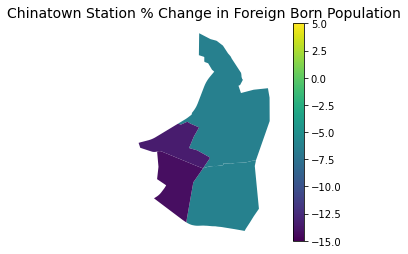

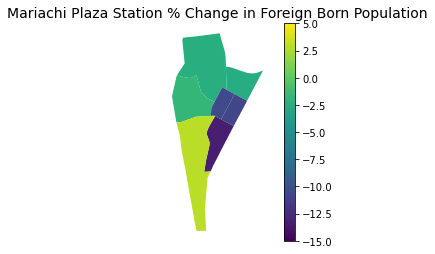

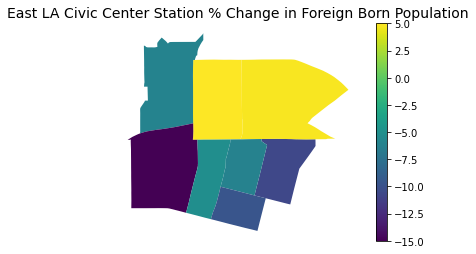

In [89]:
for station in stations:
    stn_map(station = station)

## Adding the basemap

In order to add a basemap, we have to project our gdf. 

In [ ]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

Now we update the code and use gdf_web_mercator to reflect our reflected gdf. 

In [150]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf_web_mercator[gdf_web_mercator['station']==station]
    
    # plot it
    fig,ax = plt.subplots(figsize=(12, 12))
                
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, depending on what the loop is telling it
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=5,
                alpha=0.6,
                legend=True)
    
#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    
    ax.set_title(station + ' Station' + ' % Change in Foreign Born Population', fontsize=14)
    
    # this is the basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

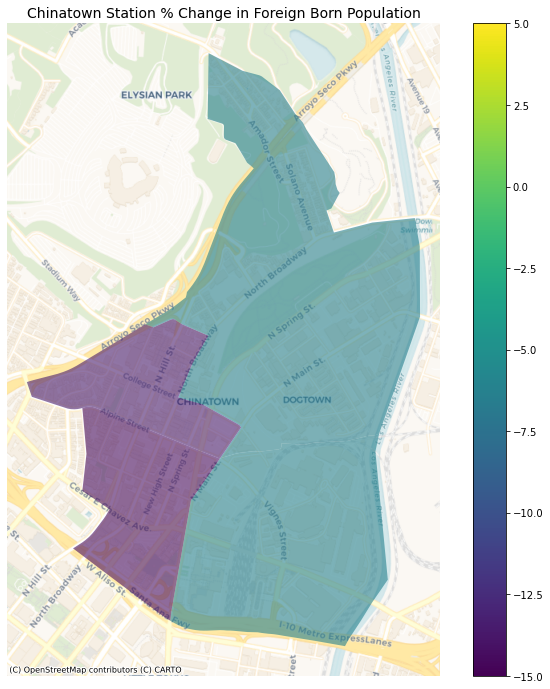

In [151]:
stn_map()

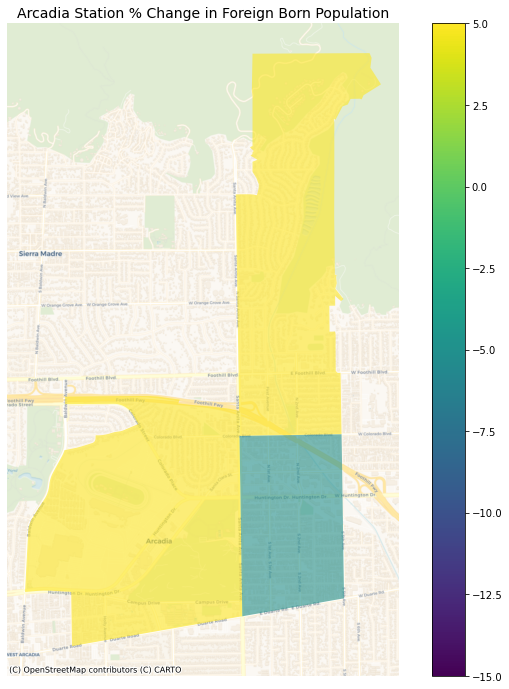

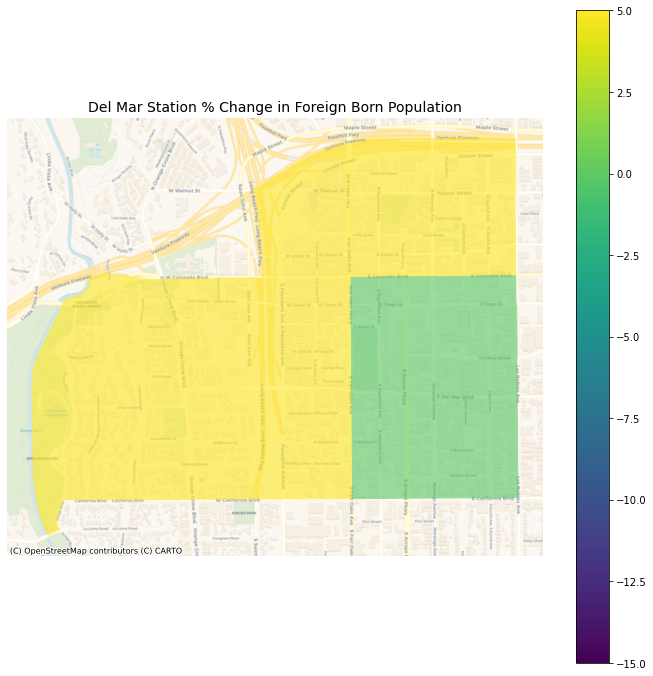

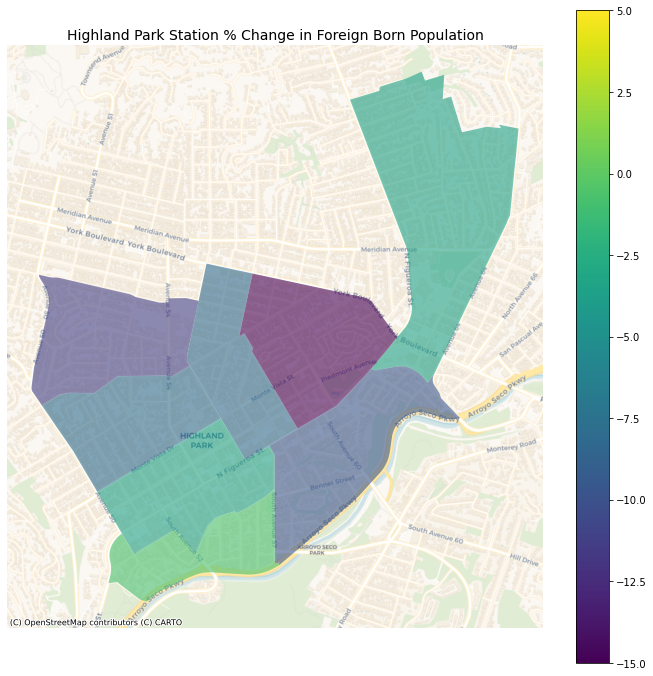

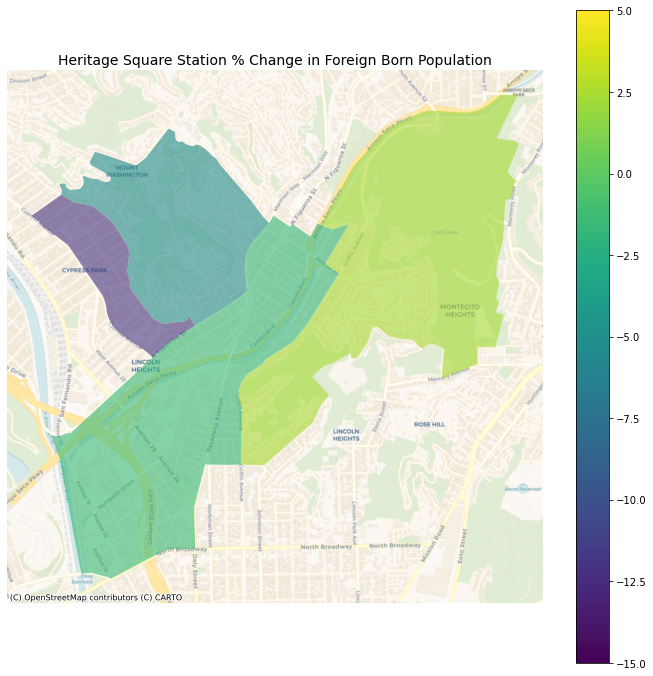

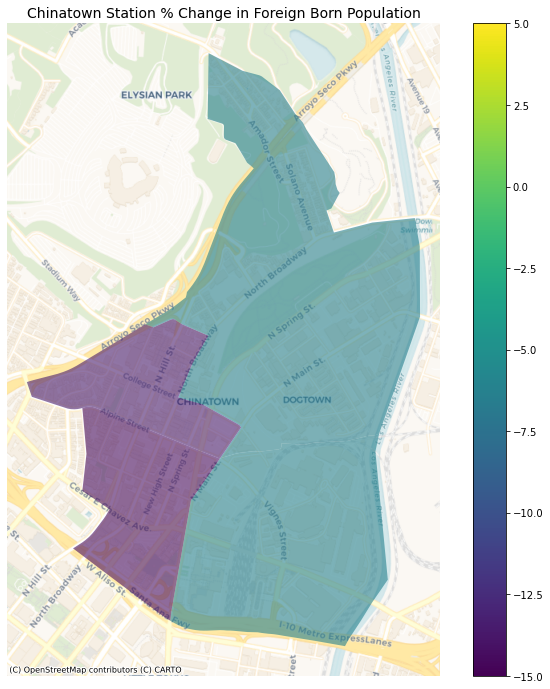

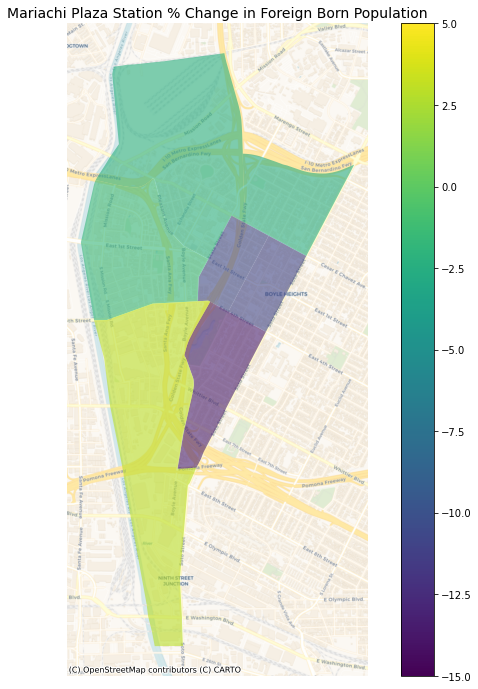

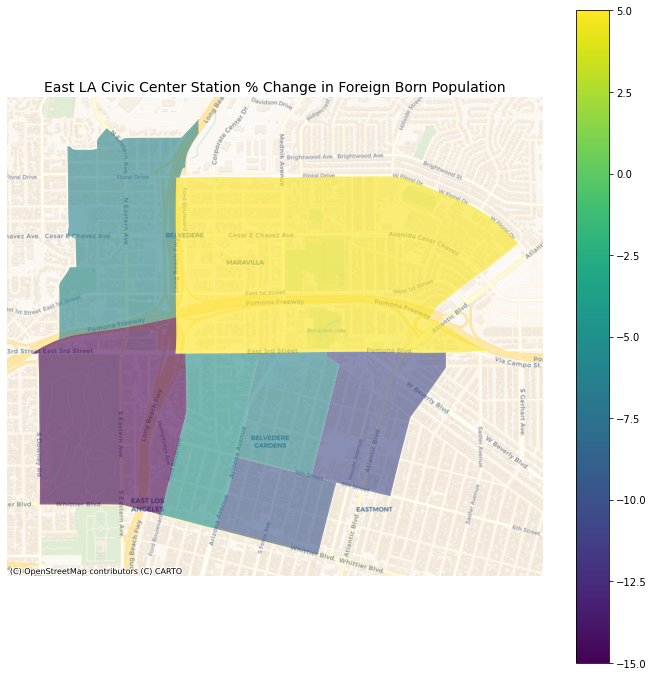

In [152]:
for station in stations:
    stn_map(station=station)

## Adding a station marker using Folium

In [160]:
import folium

In [175]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf_web_mercator[gdf_web_mercator['station']==station]
    
    # plot it
    fig,ax = plt.subplots(figsize=(12, 12))
                
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, depending on what the loop is telling it
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=5,
                alpha=0.6,
                legend=True)
    
    # marker
    this_stn.Marker(
        [34.06456962698584, -118.23588068465617], popup=None, tooltip=None).add_to(this_stn.plot)
    
#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    
    ax.set_title(station + ' Station' + ' % Change in Foreign Born Population', fontsize=14)
    
    # this is the basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

In [ ]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m)

m

AttributeError: 'GeoDataFrame' object has no attribute 'Marker'

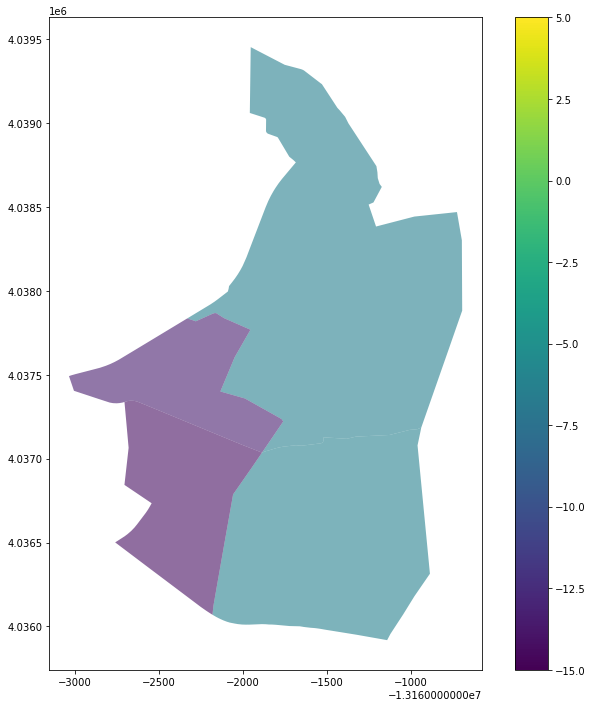

In [176]:
stn_map()

## Adding isochrone to the function

In [90]:
isochrones = gpd.read_file('isochrones.geojson')

In [91]:
isochrones.head(7)

time               station  \
0  10 mins               Arcadia   
1  10 mins               Del Mar   
2  10 mins         Highland Park   
3  10 mins       Heritage Square   
4  10 mins             Chinatown   
5  10 mins        Mariachi Plaza   
6  10 mins  East LA Civic Center   

                                            geometry  
0  POLYGON ((-13138855.977 4047634.613, -13139077...  
1  POLYGON ((-13152265.489 4047250.399, -13152352...  
2  POLYGON ((-13157762.101 4043169.744, -13157925...  
3  POLYGON ((-13159798.112 4039717.732, -13159994...  
4  POLYGON ((-13162031.671 4036937.288, -13162219...  
5  POLYGON ((-13160169.964 4034177.270, -13160494...  
6  POLYGON ((-13154285.181 4031816.938, -13155060...

In [92]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [93]:
def stn_map(station = 'Chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, depending on what the loop is telling it
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=5,
                legend=True)
    
    # add the isochrones
    this_isochrones = isochrones[isochrones['station']==station]
    
    this_isochrones.plot(alpha=0.4,
                         aspect=1,
                         ax=ax, 
                         column='time', 
                         cmap='plasma', 
                         legend=True,
                         zorder=20)

#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    ax.set_title(station + ' Station' + ' % Change in Foreign Born Population', fontsize=14)

NameError: name 'delmar_web_mercator' is not defined

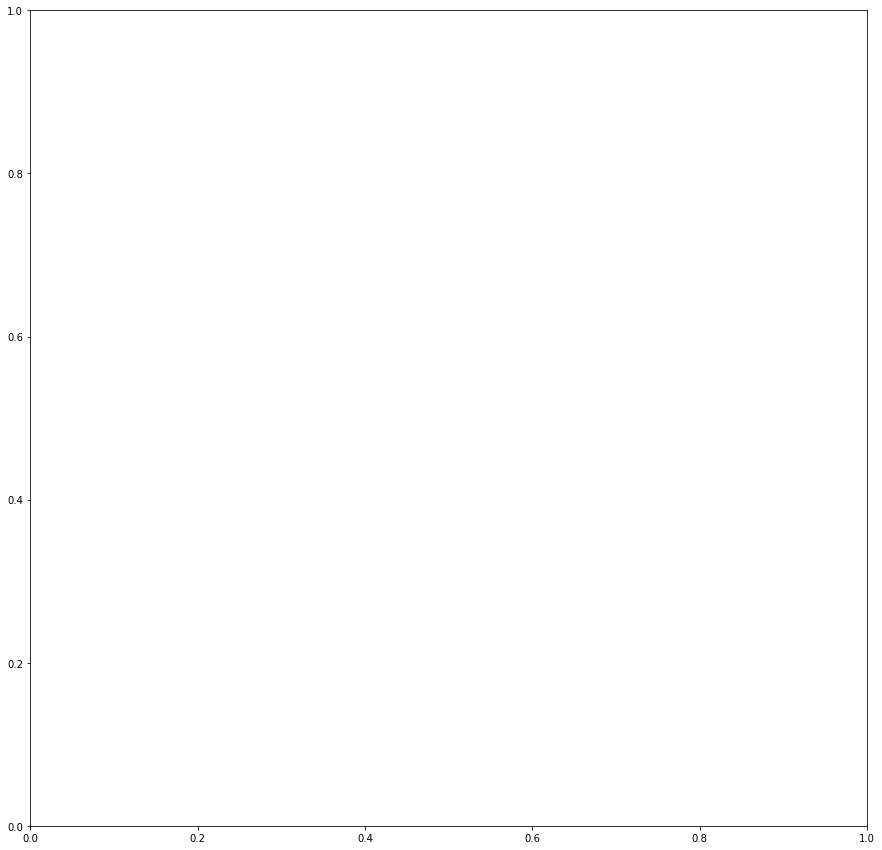

In [94]:
fig, ax = plt.subplots(figsize=(15, 15))
 
delmar_web_mercator.plot(
                    column='% Change Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Percent Change from 2011 to 2019 of Foreign Born Near L Line Del Mar Station Walkshed',fontsize=10, pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

In [ ]:
stn_map()

In [ ]:
# no luck, maybe it needs a G that's projected. using Chinatown and going to set the distance to very wide 

In [ ]:
address = 'Chinatown Station, College Street, New Chinatown, Chinatown, Los Angeles, Los Angeles County, California, 90012, United States'
network_type = 'walk'
trip_times = [10] #in minutes
meters_per_minute = 80 # travel distance per minute

In [ ]:
# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 1500)

In [ ]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

In [ ]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [ ]:
stn_map()

# IGNORE BELOW THIS

That didn't work, it just produced the same Chinatown map. 

In [ ]:
def stn_map2(station = 'Chinatown Station', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

for stop in this_stn:
    stn_map(station = stop)

In [ ]:
def stn_map3(stations = 'chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

for stop in stations:
    stn_map(station = stop)